In [7]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=True) 

In [8]:
df = pd.read_csv("D:\Minor Project\Fall Detection\Sis Fall\SisFall_dataset\SA01\F04_SA01_R01.txt", names=["A1x","A1y","A1z","Gx","Gy","Gz","A2x","A2y","A2z"])
df.to_csv()
l = []
for i in df.iloc[:,8]:
    i = int(i.replace(';',''))
    l.append(i)
df.iloc[:,8] = l
print(df)

      A1x  A1y  A1z   Gx   Gy   Gz   A2x  A2y  A2z
0       0 -198  -55 -166 -181 -444   -77 -758  -49
1      -7 -203  -50 -205 -199 -408  -101 -787  -39
2      -8 -211  -44 -226 -218 -372  -108 -805  -18
3     -10 -219  -47 -227 -235 -339  -117 -831   -4
4      -7 -226  -40 -212 -249 -308  -115 -847    5
...   ...  ...  ...  ...  ...  ...   ...  ...  ...
2995 -247    1  -49  -96    4  -19 -1037   24  -10
2996 -245   -2  -50 -102    5  -22 -1043   22   -7
2997 -245    2  -52 -106    7  -22 -1041   16   -9
2998 -248    2  -50 -108   10  -23 -1028   17  -12
2999 -243    3  -48 -110   14  -24 -1035   16  -11

[3000 rows x 9 columns]


In [9]:
df1 = df.iloc[:,[0,1,2]]
df2 = df.iloc[:,[3,4,5]]
df3 = df.iloc[:,[6,7,8]]
# df3 = df3.iloc[lambda x: x.index % 2 == 0]
# df1 = df1.head(rate)
# df2 = df2.head(rate)
# df3 = df3.head(rate)

In [10]:
l = []
phi = []
theta = []
for x,y,z in zip(df1.A1x.values, df1.A1y.values, df1.A1z.values):
    r = 0
    r = math.sqrt( (x**2) + (y**2) +(z**2) )
    l.append(r)

for x, y in zip(df1.A1x.values, df1.A1y.values):
    p = 0
    if y > 0:
        p = math.acos(x / math.sqrt( (x**2)+(y**2) ) )
    elif y <= 0:
        p = 2*math.pi - math.acos(x / math.sqrt( (x**2)+(y**2) ) )
    phi.append(p)

for z,r in zip(df1.A1z.values, l):
    t = 0
    t = math.acos(z/r)
    theta.append(t)

df1 = pd.DataFrame(np.column_stack([l , phi, theta]))

l = []
phi = []
theta = []
for x,y,z in zip(df2.Gx.values, df2.Gy.values, df2.Gz.values):
    r = 0
    r = math.sqrt( (x**2) + (y**2) +(z**2) )
    l.append(r)

for x, y in zip(df2.Gx.values, df2.Gy.values):
    p = 0
    if y > 0:
        p = math.acos(x / math.sqrt( (x**2)+(y**2) ) )
    elif y <= 0:
        p = 2*math.pi - math.acos(x / math.sqrt( (x**2)+(y**2) ) )
    phi.append(p)

for z,r in zip(df2.Gz.values, l):
    t = 0
    t = math.acos(z/r)
    theta.append(t)

df2 = pd.DataFrame(np.column_stack([l , phi, theta]))

l = []
phi = []
theta = []
for x,y,z in zip(df3.A2x.values, df3.A2y.values, df3.A2z.values):
    r = 0
    r = math.sqrt( (x**2) + (y**2) +(z**2) )
    l.append(r)

for x, y in zip(df3.A2x.values, df3.A2y.values):
    p = 0
    if y > 0:
        p = math.acos(x / math.sqrt( (x**2)+(y**2) ) )
    elif y <= 0:
        p = 2*math.pi - math.acos(x / math.sqrt( (x**2)+(y**2) ) )
    phi.append(p)

for z,r in zip(df3.A2z.values, l):
    t = 0
    t = math.acos(z/r)
    theta.append(t)

df3 = pd.DataFrame(np.column_stack([l , phi, theta]))

df1 = df1.rename(columns={0: "r",1: "phi",2: "theta"}, inplace = False)
df2 = df2.rename(columns={0: "r",1: "phi",2: "theta"}, inplace = False)
df3 = df3.rename(columns={0: "r",1: "phi",2: "theta"}, inplace = False)

In [11]:
print(df1,df2,df3)

               r       phi     theta
0     205.496959  4.712389  1.841743
1     209.184129  4.677920  1.812157
2     215.687274  4.674492  1.776237
3     224.209723  4.666759  1.781988
4     229.619250  4.681425  1.745891
...          ...       ...       ...
2995  251.815409  3.137544  1.766633
2996  250.057993  3.149756  1.772107
2997  250.465566  3.133430  1.779931
2998  252.998024  3.133528  1.769736
2999  247.713544  3.129248  1.765802

[3000 rows x 3 columns]                r       phi     theta
0     507.398266  3.970192  2.636340
1     498.086338  3.912140  2.530698
2     486.810025  3.908975  2.440532
3     470.823746  3.944305  2.374620
4     449.231566  4.007079  2.326245
...          ...       ...       ...
2995   97.943861  3.099950  1.766023
2996  104.465305  3.092612  1.782981
2997  108.485022  3.075651  1.775006
2998  110.873802  3.049263  1.779757
2999  113.454837  3.015001  1.783945

[3000 rows x 3 columns]                 r       phi     theta
0      763.474950  4.611

In [12]:
window = float(input("Window size (secs): "))
a = int(len(df1.r.values) / ( ( len(df1.r.values) / 15) * window))

In [13]:
temp = pd.DataFrame(df1.r.rolling(a,min_periods=1).mean())
temp = temp.rename(columns={"r":"rf"}, inplace = False)
MAR_df_r = pd.concat([df1.r,temp.rf], axis=1)
MAR_df_r = MAR_df_r.iloc[lambda x: x.index % 4 == 0]
MAR_df_r
# temp

,r,rf
0,205.496959,205.496959
4,229.619250,216.839467
8,246.742781,227.512550
12,253.211374,235.224181
16,246.572505,238.707008
...,...,...
2980,249.851956,250.544921
2984,251.029879,250.349597
2988,249.659768,250.086792
2992,251.831293,250.863328


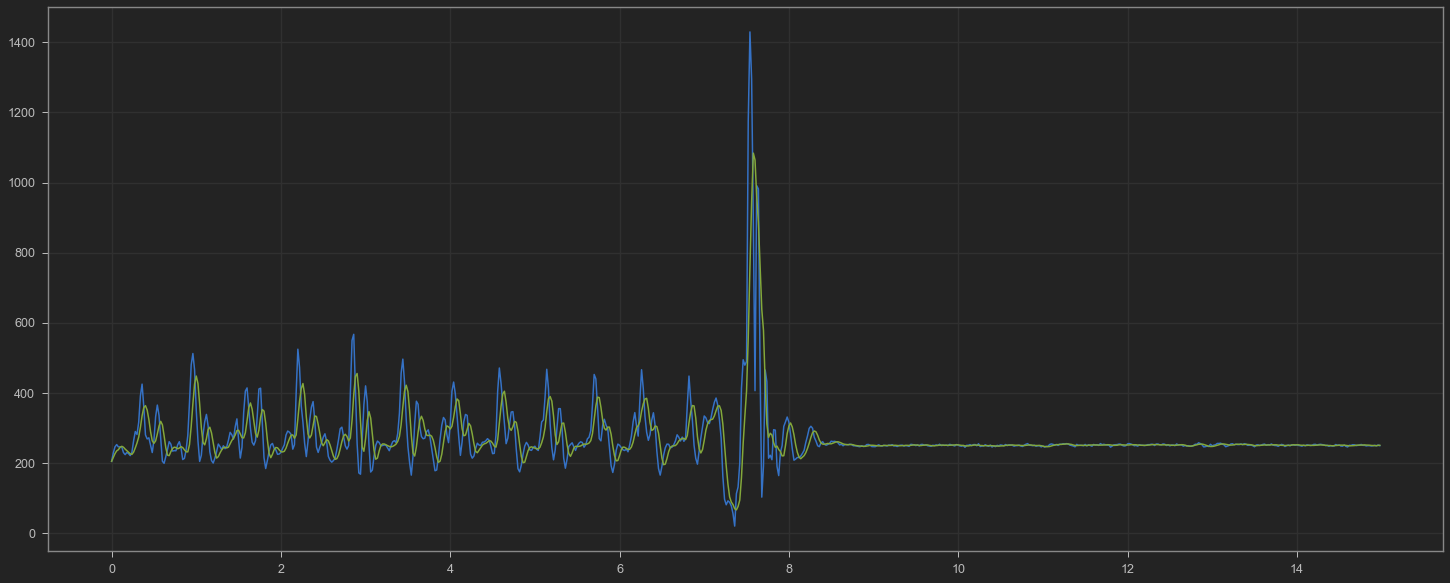

In [15]:
plt.figure(figsize=(25,10))
xpnt = []
interval = 15 / len (MAR_df_r.values)
for i in range(len (MAR_df_r.values)):
    x = i * interval
    xpnt.append(x)
ypnt = MAR_df_r.values
plt.plot(xpnt, ypnt)
plt.show()

In [16]:
window = float(input("Window size (secs): "))
a = int(len(df1.r.values) / ( ( len(df1.r.values) / 15) * window))

In [17]:
temp = pd.DataFrame(df1.phi.rolling(a,min_periods=1).mean())
temp = temp.rename(columns={"phi":"phif"}, inplace = False)
MAR_df_phi = pd.concat([df1.phi,temp.phif], axis=1)
MAR_df_phi = MAR_df_phi.iloc[lambda x: x.index % 4 == 0]
MAR_df_phi

,phi,phif
0,4.712389,4.712389
4,4.681425,4.682597
8,4.696064,4.683235
12,4.736194,4.694333
16,4.781666,4.712071
...,...,...
2980,3.141593,3.142769
2984,3.141593,3.143163
2988,3.137511,3.142583
2992,3.129448,3.140851


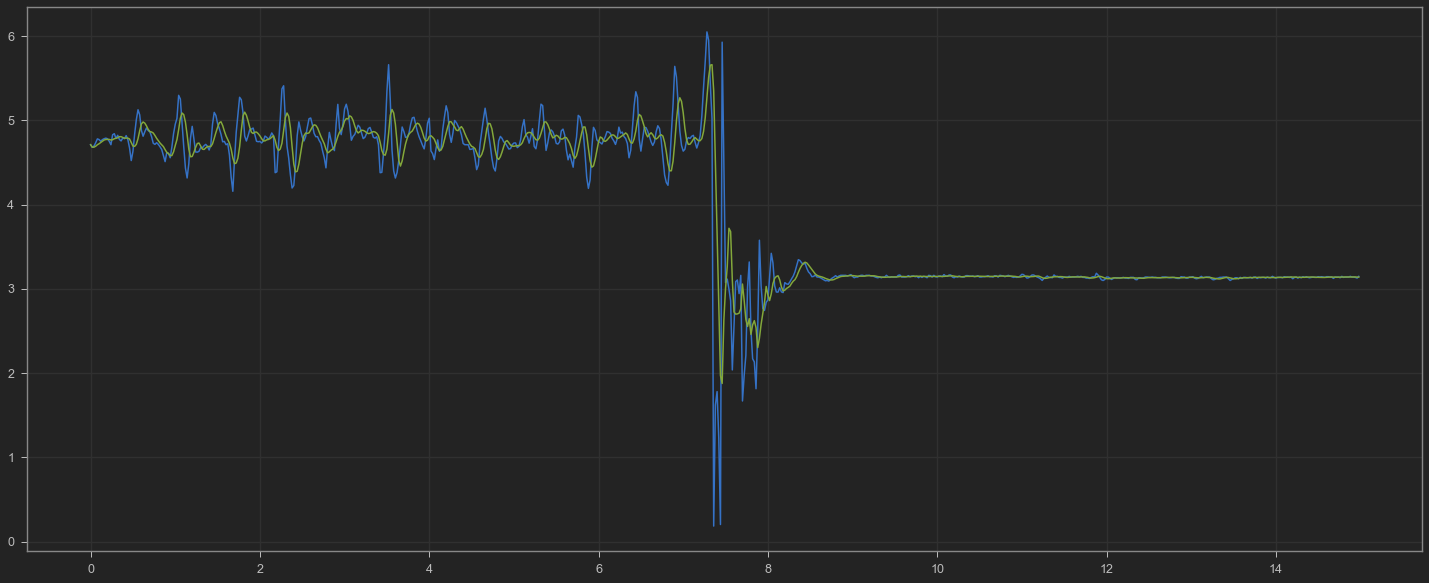

In [19]:
plt.figure(figsize=(25,10))
xpnt = []
interval = 15 / len (MAR_df_phi.values)
for i in range(len (MAR_df_phi.values)):
    x = i * interval
    xpnt.append(x)
ypnt = MAR_df_phi.values
plt.plot(xpnt, ypnt)
plt.show()

In [20]:
window = float(input("Window size (secs): "))
a = int(len(df1.r.values) / ( ( len(df1.r.values) / 15) * window))

In [21]:
temp = pd.DataFrame(df1.theta.rolling(a,min_periods=1).mean())
temp = temp.rename(columns={"theta":"thetaf"}, inplace = False)
MAR_df_theta = pd.concat([df1.theta,temp.thetaf], axis=1)
MAR_df_theta = MAR_df_theta.iloc[lambda x: x.index % 4 == 0]
MAR_df_theta

,theta,thetaf
0,1.841743,1.841743
4,1.745891,1.791603
8,1.688600,1.750428
12,1.665721,1.729028
16,1.660138,1.713941
...,...,...
2980,1.768192,1.769836
2984,1.771317,1.768092
2988,1.764263,1.767931
2992,1.766620,1.768808


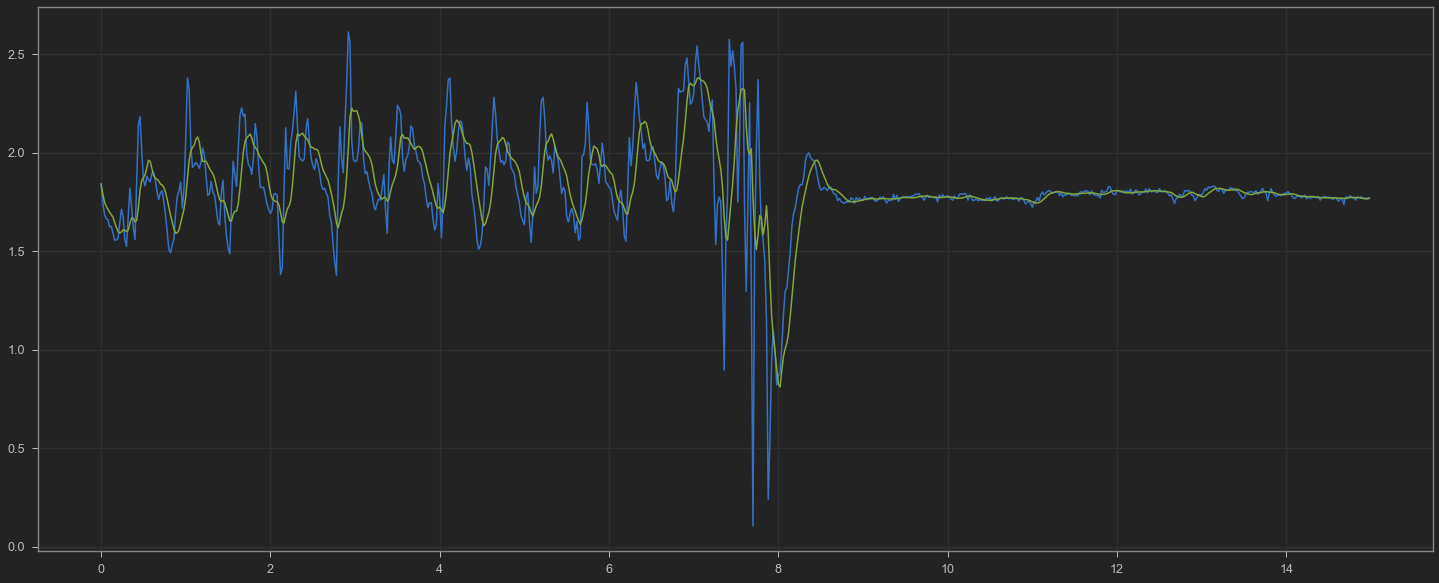

In [23]:
plt.figure(figsize=(25,10))
xpnt = []
interval = 15 / len (MAR_df_theta.values)
for i in range(len (MAR_df_theta.values)):
    x = i * interval
    xpnt.append(x)
ypnt = MAR_df_theta.values
plt.plot(xpnt, ypnt)
plt.show()

In [24]:
dfg = pd.concat([MAR_df_r.rf,MAR_df_phi.phif], axis=1)
dfg = pd.concat([dfg,MAR_df_theta.thetaf], axis=1)
dfg.describe()

,rf,phif,thetaf
count,750.000000,750.000000,750.000000
mean,273.243773,3.943739,1.831464
std,81.023002,0.859940,0.186460
min,67.079975,1.878353,0.810574
25%,249.990586,3.139518,1.766988
50%,251.987368,3.306845,1.794186
75%,278.475930,4.789820,1.925493
max,1084.123447,5.662626,2.382004


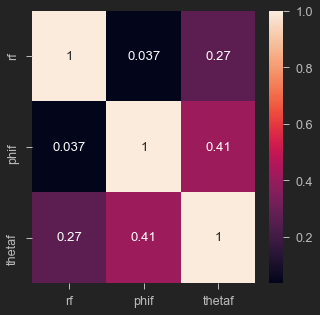

In [25]:
correlations = dfg.corr()
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(correlations, annot = True)

In [26]:
correlations

,rf,phif,thetaf
rf,1.000000,0.037102,0.267044
phif,0.037102,1.000000,0.411283
thetaf,0.267044,0.411283,1.000000
